# Basic data manipulation with pandas

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("transactions_small.csv", header=None)
data.head()

,0,1,2,3
0,0,2017-04-09 17:20:09,10323,33.79
1,1,2018-08-04 22:47:48,10081,32.82
2,2,2017-07-25 18:44:21,10203,54.88
3,3,2018-05-28 01:47:21,10376,56.67
4,4,2016-01-23 12:25:38,10482,48.82


In [7]:
data.shape

(10000, 4)

In [8]:
data.columns =['record_id', 'date', 'user_id', 'amount']

In [9]:
data.head()

,record_id,date,user_id,amount
0,0,2017-04-09 17:20:09,10323,33.79
1,1,2018-08-04 22:47:48,10081,32.82
2,2,2017-07-25 18:44:21,10203,54.88
3,3,2018-05-28 01:47:21,10376,56.67
4,4,2016-01-23 12:25:38,10482,48.82


In [10]:
print(data.dtypes)

record_id      int64
date          object
user_id        int64
amount       float64
dtype: object


In [11]:
#Using Pandas series to sort out time.
def get_date_info(df):
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['hour'] = df['date'].dt.hour
    df['time'] = df['date'].dt.time

    return(df)

In [12]:
data['date'] = pd.to_datetime(data['date'])

In [13]:
data = get_date_info(data)

In [14]:
data.head()

,record_id,date,user_id,amount,year,month,hour,time
0,0,2017-04-09 17:20:09,10323,33.79,2017,4,17,17:20:09
1,1,2018-08-04 22:47:48,10081,32.82,2018,8,22,22:47:48
2,2,2017-07-25 18:44:21,10203,54.88,2017,7,18,18:44:21
3,3,2018-05-28 01:47:21,10376,56.67,2018,5,1,01:47:21
4,4,2016-01-23 12:25:38,10482,48.82,2016,1,12,12:25:38


# Timer to measure time

In [15]:
import time
class Timer(object):
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        self.start_time = time.time()

    def stop(self):
        self.times.append(time.time() - self.start_time)
        return self.times[-1]


### Calculate mean by year and month

In [16]:
timer = Timer()
def mean(n,thg):
    timer.start()
    sum=0
    v=0
    for i in range(len(data)) :
        if (data.loc[i,'year'] == n)&(data.loc[i,'month'] == thg):
            sum=sum+data.loc[i,'amount']
            v=v+1
    print('Time to exec mean_func %.5f sec:' % timer.stop())
    return(sum/v)

In [17]:
mean(2016,12)

Time to exec mean_func 0.22240 sec:


31.510048543689322

### Display amount by year and month

In [18]:
timer = Timer()
def da(n,thg):
    timer.start()
    da=[]
    for i in range(len(data)) :
        if (data.loc[i,'year'] == n)&(data.loc[i,'month'] == thg):
            da.append(data.loc[i,'amount'])
    print('Time to exec mean_func %.5f sec:' % timer.stop())
    return(da)

In [19]:
da(2016,12)

Time to exec mean_func 0.30435 sec:


[42.69,
 19.6,
 6.3,
 33.46,
 14.65,
 36.27,
 32.16,
 77.82,
 1.28,
 28.84,
 39.62,
 29.57,
 28.83,
 11.27,
 56.47,
 55.65,
 29.29,
 62.21,
 20.06,
 76.65,
 40.12,
 29.98,
 9.52,
 36.52,
 38.16,
 1.4,
 68.53,
 58.31,
 27.06,
 18.75,
 18.35,
 23.7,
 -1.24,
 26.62,
 -1.93,
 15.79,
 57.5,
 35.97,
 65.33,
 4.56,
 38.75,
 67.23,
 1.67,
 77.89,
 4.99,
 -8.66,
 40.16,
 30.32,
 14.38,
 54.37,
 5.44,
 5.94,
 75.99,
 38.02,
 20.39,
 26.44,
 35.68,
 57.09,
 44.77,
 56.2,
 44.65,
 39.0,
 25.57,
 39.9,
 37.96,
 3.4,
 36.04,
 29.73,
 51.72,
 6.8,
 51.15,
 12.01,
 12.65,
 24.25,
 47.11,
 -4.76,
 8.46,
 65.7,
 2.65,
 48.04,
 22.24,
 51.56,
 46.26,
 47.65,
 29.57,
 48.85,
 59.3,
 16.71,
 -11.7,
 52.05,
 52.79,
 55.14,
 26.59,
 -2.16,
 50.89,
 74.51,
 59.86,
 61.09,
 -9.5,
 11.11,
 45.47,
 16.67,
 31.06,
 43.86,
 45.35,
 44.68,
 23.13,
 48.56,
 -5.55,
 18.32,
 43.41,
 18.09,
 48.65,
 88.93,
 27.48,
 26.84,
 41.5,
 30.94,
 18.18,
 33.68,
 -30.16,
 37.12,
 72.61,
 27.46,
 77.96,
 69.01,
 17.69,
 11.41,
 3

# Draw seaborn

C:\Users\HP\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


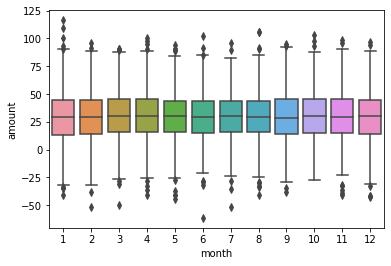

In [20]:
def creating_boxplots(n):
    for i in range(len(data)) :
        if (data.loc[i,'year'] == n):
            x=data.loc[:,'month']
            y=data.loc[:,'amount']
    sns.boxplot(x,y);
    plt.show()
    
creating_boxplots(2016)

C:\Users\HP\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


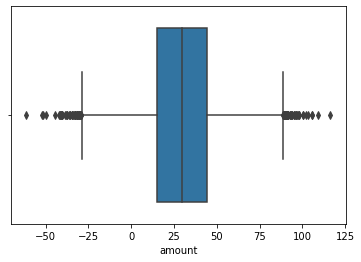

In [21]:
def creating_boxplots(n,thg):
    for i in range(len(data)) :
        if (data.loc[i,'year'] == n)&(data.loc[i,'month'] == thg):
            da=data.loc[:,'amount']
    sns.boxplot(da);
    plt.show()
    
creating_boxplots(2016,12)

# Exercises

### 1. Write a function to print all user that has id is even ( 5 minutes)

In [22]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [23]:
def odd_even(number):
    if number%2==0:
        return 'even'
    else:
        return 'odd'
K = []
for i in range(len(data)):
    K.append(odd_even(data.iloc[i]['user_id']))
data['odd or even'] = K
data.head()


,record_id,date,user_id,amount,year,month,hour,time,odd or even
0,0,2017-04-09 17:20:09,10323,33.79,2017,4,17,17:20:09,odd
1,1,2018-08-04 22:47:48,10081,32.82,2018,8,22,22:47:48,odd
2,2,2017-07-25 18:44:21,10203,54.88,2017,7,18,18:44:21,odd
3,3,2018-05-28 01:47:21,10376,56.67,2018,5,1,01:47:21,even
4,4,2016-01-23 12:25:38,10482,48.82,2016,1,12,12:25:38,even


In [24]:
B = []
for i in range(len(data)):
    if 

SyntaxError: invalid syntax (<ipython-input-24-2db2f884f2e9>, line 3)